In [65]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Activation functions

In [66]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def cosine(x):
    return np.cos(x)

def gaussian(x):
    return np.exp(-((x**2)/2))

def null(x):
    return x

In [67]:
activations_list = [sigmoid,tanh,cosine,gaussian, null]
act_dict = {0.1:sigmoid, 0.2:tanh, 0.3:cosine, 0.4:gaussian, 0.5:null}

In [68]:
f = np.random.choice(list(act_dict.keys()))
f

0.4

In [69]:
h = np.random.choice(list(act_dict.keys()))
h

0.5

### Testing activation functions

In [70]:
test_inputs = np.arange(-10,10,0.01)

Text(0.5, 1.0, 'Gaussian')

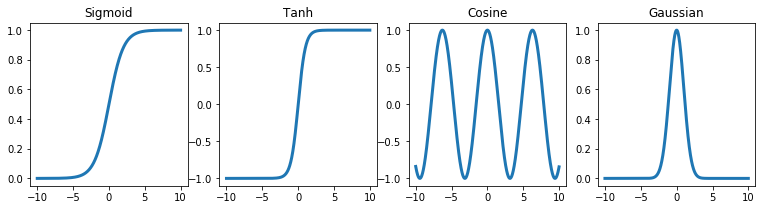

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,3))
axes[0].plot(test_inputs,sigmoid(test_inputs),linewidth=3)
axes[0].set_title("Sigmoid")
axes[1].plot(test_inputs,tanh(test_inputs),linewidth=3)
axes[1].set_title("Tanh")
axes[2].plot(test_inputs,cosine(test_inputs),linewidth=3)
axes[2].set_title("Cosine")
axes[3].plot(test_inputs,gaussian(test_inputs),linewidth=3)
axes[3].set_title("Gaussian")

TypeError: 'AxesSubplot' object is not subscriptable

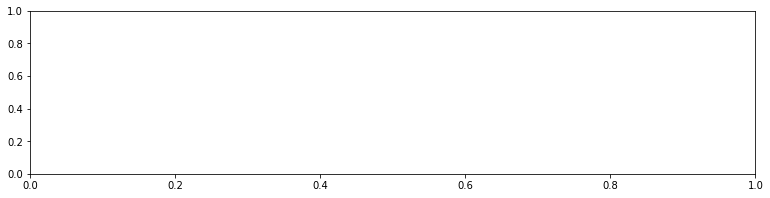

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13,3))
axes[0].plot(test_inputs,null(test_inputs),linewidth=3)
axes[0].set_title("Null")

## Inputs & Outputs

In [15]:
df = pd.read_csv("Data/2in_xor.txt", sep="\t", header=None)
df.columns = ["x","y"]
x = df["x"]
y = df["y"]

df.head()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [72]:
#I thought about having our imputs and outputs as array of 1D, so maybe they can be easier to comare
data = np.loadtxt("Data/2in_xor.txt")
data.shape

(100, 3)

In [73]:
imput = data[:, :2] 
imput.shape

(100, 2)

In [74]:
output = data[:, 2:]
output.shape

(100, 1)

## Simplified Neural Network

Source: https://www.youtube.com/watch?v=bxe2T-V8XRs




x = input <br>
W1 = weights from input layer to hidden layer <br>
z2 = x * W1 <br>
a2 = activation of z2 (x * W1) <br>
W2  weights from hidden layer to output layer <br>
z3 = a2 * W2 activation of z3 <br>
yHat = predicted output <br>

In [75]:
class SimplifiedNeuralNetwork(object):
    
    def __init__(self):
        self.fitness = -1.
        
        self.inputLayerSize=2
        self.outputLayerSize=1
        self.hiddenlayerSize=3
                
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenlayerSize)
        self.W2 = np.random.randn(self.hiddenlayerSize, self.outputLayerSize)
        self.a2_func = np.random.choice(list(act_dict.keys()))
        self.yHat_func = np.random.choice(list(act_dict.keys()))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1) # Product of input layer and weights1
        self.a2 = act_dict[self.a2_func](self.z2) # Activation & z2  
        self.z3 = np.dot(self.a2, self.W2) # Product of a2 & weights2
        yHat = act_dict[self.yHat_func](self.z3) # Activation of z3
        return yHat   
    
    def __str__(self):
        return f"Network:W1{self.W1}, Fitness:{self.fitness}, Imput value:{imput}, Predicted values:{yHat}"   
    
    @property
    def getParams(self):
        array = self.W1.ravel()
        array = np.append(array,self.a2_func)
        array = np.append(array,self.W2.ravel())
        array = np.append(array,self.yHat_func)
        return array     

In [84]:
nn1 = SimplifiedNeuralNetwork()
yHat = nn1.forward(imput)
yHat.shape
#yHat, output
print(nn1)

Network:W1[[-1.43870036  0.50314405  0.05453546]
 [-1.14603467  1.24560951 -0.65037188]], Fitness:-1.0, Imput value:[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [

In [78]:
def rmse(predict, target):
    rmse_val = np.square(np.subtract(target, predict)).mean()
    return rmse_val

def feedForward(networks):
    for network in networks:
            yHat = network.forward(imput)
            error = rmse(yHat,output)
            network.fitness = error
    return network

In [79]:
meansq = rmse(yHat, output)
meansq

0.4709039040639936

## PSO

source: https://jamesmccaffrey.wordpress.com/2015/06/09/particle-swarm-optimization-using-python/


source: https://medium.com/analytics-vidhya/implementing-particle-swarm-optimization-pso-algorithm-in-python-9efc2eb179a6

In [374]:
class Particle():
    
    def __init__(self,SimplifiedNeuralNetwork):
        self.position = SimplifiedNeuralNetwork.getParams
        self.velocity = np.zeros(SimplifiedNeuralNetwork.getParams.shape)
        self.personal_best = np.zeros(SimplifiedNeuralNetwork.getParams.shape)
        
    def move(self):
        self.position = self.position + self.velocity
        
def Solve(max_epochs,num_networks):
    networks = [SimplifiedNeuralNetwork() for i in range(num_networks)]
    Y = [feedForward(networks)]
    
    for network in Y:
        print(network)
        #print(Y)
        
    

In [375]:
g = np.array([0,0])
g

array([0, 0])

In [376]:
h = np.zeros(nn1.getParams.shape)
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [377]:
Solve(10,10)

Network:W1[[ 0.14019806 -0.34322503  0.22791933]
 [ 0.77132479 -0.84115051 -0.4842814 ]], Fitness:0.33636133539075563, Imput value:[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 